In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import bson
import matplotlib.pyplot as plt
import recursive_feature_elimination
from sklearn.model_selection import train_test_split

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
processed_data_path = "/Users/sakshamarora/Documents/6748 Practicum/processed_data"

In [3]:
merged_df_with_2P = pd.read_csv('../../../processed_data/Women_merged_df_with_2P.csv')

In [4]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace('[{}:,"]', '', regex=True)  # Replace special JSON characters
    df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores
    return df

# Select features for the model
X = merged_df_with_2P.drop([
    'game_id', 'team_id', 'team_id', 'season_id', 'player_id', 'shot_id', 'segment_id', 'date', 
    'has_locations', 'has_segments', 'team1', 'team2', 'hometeam', 'Made', 'Time', 'Stat', 'season', 
    'league', 'score','winning_team', 'score_opp', 'And1', 'Blocked', 'Assisted','Unnamed: 0'
], axis=1)

# Clean column names
X = clean_column_names(X)

# Define categorical features
categorical_features = ['Location', 'Zone', 'Period', 'LBA_position', 'year', 'Shot_type'] 

# Convert categorical columns to 'category' type
for col in categorical_features:
    if col in X.columns:  # Check if the column exists in the DataFrame
        X[col] = X[col].astype('category')

# Define the target variable
y = merged_df_with_2P['Made']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Recursive Feature Elimination

In [6]:
rfe_object = recursive_feature_elimination.rfe(X_train,y_train,X_test,y_test,categorical_features)

[LightGBM] [Info] Number of positive: 161133, number of negative: 197031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14225
[LightGBM] [Info] Number of data points in the train set: 358164, number of used features: 124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.449886 -> initscore=-0.201131
[LightGBM] [Info] Start training from score -0.201131
[LightGBM] [Info] Number of positive: 161133, number of negative: 197031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13980
[LightGBM] [Info] Number of data points in the train set: 358164, number of used features: 109
[LightGB

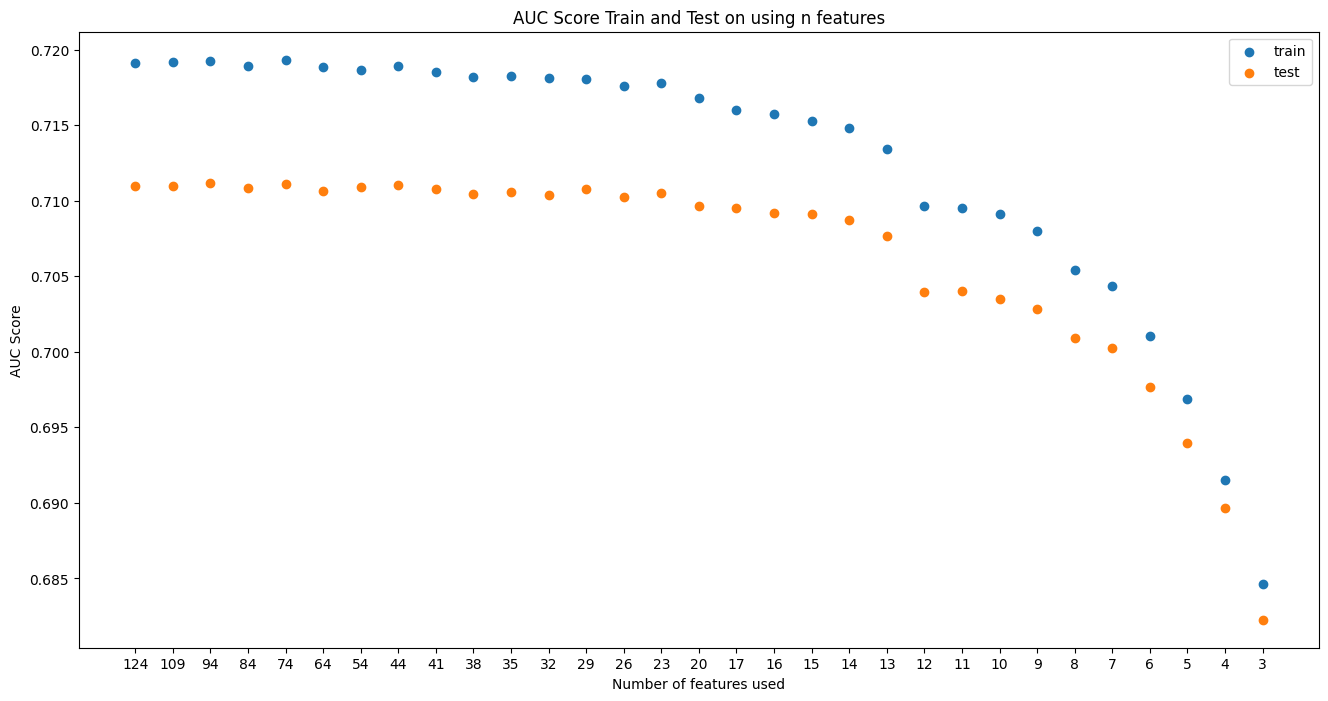

In [7]:
df,fig = rfe_object.run_rfe()

In [11]:
rfe_object.get_top_k_feature_list(26)

array(['Fastbreak', 'Distance', 'Jumpshot', 'Red_Zone', 'height',
       'Off_Steal', 'Drive', 'Shot_type', 'TOT_Shot_type_perc%',
       'clutch_time', 'Zone', 'TOT_2P%', 'TOT_Zone_made',
       'Last_season_2P%', 'score_pre_shot_diff',
       'opp_team_wl_ratio_prev_season', 'Last_season_Shot_type_perc%',
       'Last_season_Jumpshots_assisted_on', 'Big',
       'team_wl_ratio_prev_season', 'L10_2P%', 'score_pre_shot',
       'Time_Seconds', 'TOT_Shot_type_made', 'opp_w_l_ratio_last_10',
       'TOT_Jumpshots_assisted_on'], dtype=object)